In [1]:
import pandas as pd
import glob
import os
import seaborn as sns
import matplotlib.pyplot as plt
from torch_geometric.utils import is_undirected, to_networkx, degree
import networkx as nx
from DatasetManager import DatasetManager
from torch_geometric.datasets import Planetoid, Twitch
from torch_geometric.utils import to_networkx

In [2]:
# --- Data Loading and Processing ---
csv_files = glob.glob('results/datasets/*.csv')
all_data = []
for f in csv_files:
    try:
        # Extract dataset name from the folder path
        dataset_name = f.split('_')[0].split('/')[-1]
        
        df = pd.read_csv(f)
        df['dataset_name'] = dataset_name
        all_data.append(df)
    except pd.errors.EmptyDataError:
        print(f"Warning: The file {f} is empty and will be skipped.")

full_df = pd.concat(all_data, ignore_index=True)
metric_cols = ['AUC', 'MRR', 'Hits@10', 'Hits@50', 'Hits@100']
for col in metric_cols:
    full_df[col] = pd.to_numeric(full_df[col], errors='coerce')

full_df.dropna(subset=metric_cols, inplace=True)
avg_df = full_df.groupby(['dataset_name', 'model_name'])[metric_cols].mean().reset_index()

avg_df

,dataset_name,model_name,AUC,MRR,Hits@10,Hits@50,Hits@100
0,Citeseer,AdamicAdarModel,0.6445,0.1843,0.2933,0.2933,0.2933
1,Citeseer,CommonNeighborsModel,0.6444,0.1136,0.2933,0.2933,0.2933
2,Citeseer,DecisionTreeModel,0.7122,0.0787,0.3680,0.5073,0.5205
3,Citeseer,GCNModel1,0.7482,0.0642,0.1202,0.3314,0.5337
4,Citeseer,GCNModel2,0.9244,0.3905,0.5660,0.7375,0.8270
5,Citeseer,GraphSAGEModel1,0.5966,0.0740,0.1628,0.3050,0.3798
6,Citeseer,GraphSAGEModel2,0.8611,0.2445,0.4340,0.5484,0.6041
7,Citeseer,JaccardIndexModel,0.6446,0.1645,0.2933,0.2933,0.2933
8,Citeseer,KNNModel,0.7202,0.0773,0.4604,0.5029,0.5308
9,Citeseer,LogisticRegressionModel,0.6413,0.2212,0.4062,0.5059,0.5264


In [23]:
datasets_to_analyze = sorted(avg_df['dataset_name'].unique()) if not avg_df.empty else []
print(f"Ready to analyze {len(datasets_to_analyze)} datasets: {datasets_to_analyze}")

Ready to analyze 4 datasets: ['Citeseer', 'Cora', 'Twitch-DE', 'Twitch-EN']


In [24]:
network_stats = []
datasets_to_analyze = sorted(avg_df['dataset_name'].unique()) if not avg_df.empty else []

print(f"Analyzing {len(datasets_to_analyze)} datasets to gather network statistics...")

for dataset_name in datasets_to_analyze:
    print(f"  - Processing {dataset_name}...")
    
    path = '/tmp/'
    if dataset_name.lower().startswith('twitch'):
        country_code = dataset_name.split('-')[-1].upper()
        dataset = Twitch(root=path + "Twitch", name=country_code)
    elif dataset_name.lower() in ['cora', 'citeseer', 'pubmed']:
        dataset = Planetoid(root=path + dataset_name, name=dataset_name)
    else:
        print(f"    Warning: Skipping '{dataset_name}', direct loading not configured.")
        continue

    full_graph_data = dataset[0]
    
    G = to_networkx(full_graph_data, to_undirected=True)
    
    num_nodes = full_graph_data.num_nodes
    num_edges = full_graph_data.num_edges
    
    stats_dict = {
        'Dataset': dataset_name,
        'Nodes': num_nodes,
        'Edges': num_edges,
        'Avg. Node Degree': (2 * num_edges) / num_nodes, # 2*E/N for undirected
        'Node Feature Dim.': full_graph_data.num_features,
        'Density': nx.density(G),
        'Is Connected': nx.is_connected(G),
        '# Components': nx.number_connected_components(G)
    }
    network_stats.append(stats_dict)

stats_df = pd.DataFrame(network_stats).set_index('Dataset')
display(stats_df.style.format({
    'Avg. Node Degree': '{:.2f}',
    'Density': '{:.6f}'
}))


Analyzing 4 datasets to gather network statistics...
  - Processing Citeseer...
  - Processing Cora...
  - Processing Twitch-DE...
  - Processing Twitch-EN...


,Nodes,Edges,Avg. Node Degree,Node Feature Dim.,Density,Is Connected,# Components
Dataset,,,,,,,
Citeseer,3327,9104,5.47,3703,0.000823,False,438
Cora,2708,10556,7.80,1433,0.001440,False,78
Twitch-DE,9498,315774,66.49,128,0.003606,True,1
Twitch-EN,7126,77774,21.83,128,0.001672,True,1


In [7]:
def plot_metrics(dataset_name):
    save_fig = True
    dataset_results_df = avg_df[avg_df['dataset_name'] == dataset_name].sort_values(by='AUC', ascending=False)
 
    melted_df = dataset_results_df.melt(
        id_vars=['dataset_name', 'model_name'],
        value_vars=metric_cols,
        var_name='Metric',
        value_name='Score'
    )

    sns.set_theme(style="whitegrid")
    fig, ax = plt.subplots(figsize=(25, 8))

    barplot = sns.barplot(
        data=melted_df,
        x='model_name',
        y='Score',
        hue='Metric',
        ax=ax,
        palette='magma'
    )

    ax.set_title(f'Model Performance on {dataset_name} Dataset', fontsize=22, pad=20)
    ax.set_xlabel('Model', fontsize=16, labelpad=15)
    ax.set_ylabel('Score', fontsize=16)
    ax.tick_params(axis='x', rotation=45, labelsize=12)
    ax.tick_params(axis='y', labelsize=12)
    ax.set_ylim(0, 1.05)
    
    for p in barplot.patches:
        if p.get_height() > 0.01:
            barplot.annotate(format(p.get_height(), '.2f'),
                           (p.get_x() + p.get_width() / 2., p.get_height()),
                           ha = 'center', va = 'center',
                           xytext = (0, 9),
                           textcoords = 'offset points',
                           fontsize=9)

    plt.legend(title='Metric', fontsize=12, title_fontsize=14, bbox_to_anchor=(1.02, 1), loc='upper left')

    plt.tight_layout(rect=[0, 0, 0.9, 1])
    if save_fig:
        fig.savefig(f'results/plots/{dataset_name}_model_performance.png', bbox_inches='tight')
    plt.show()

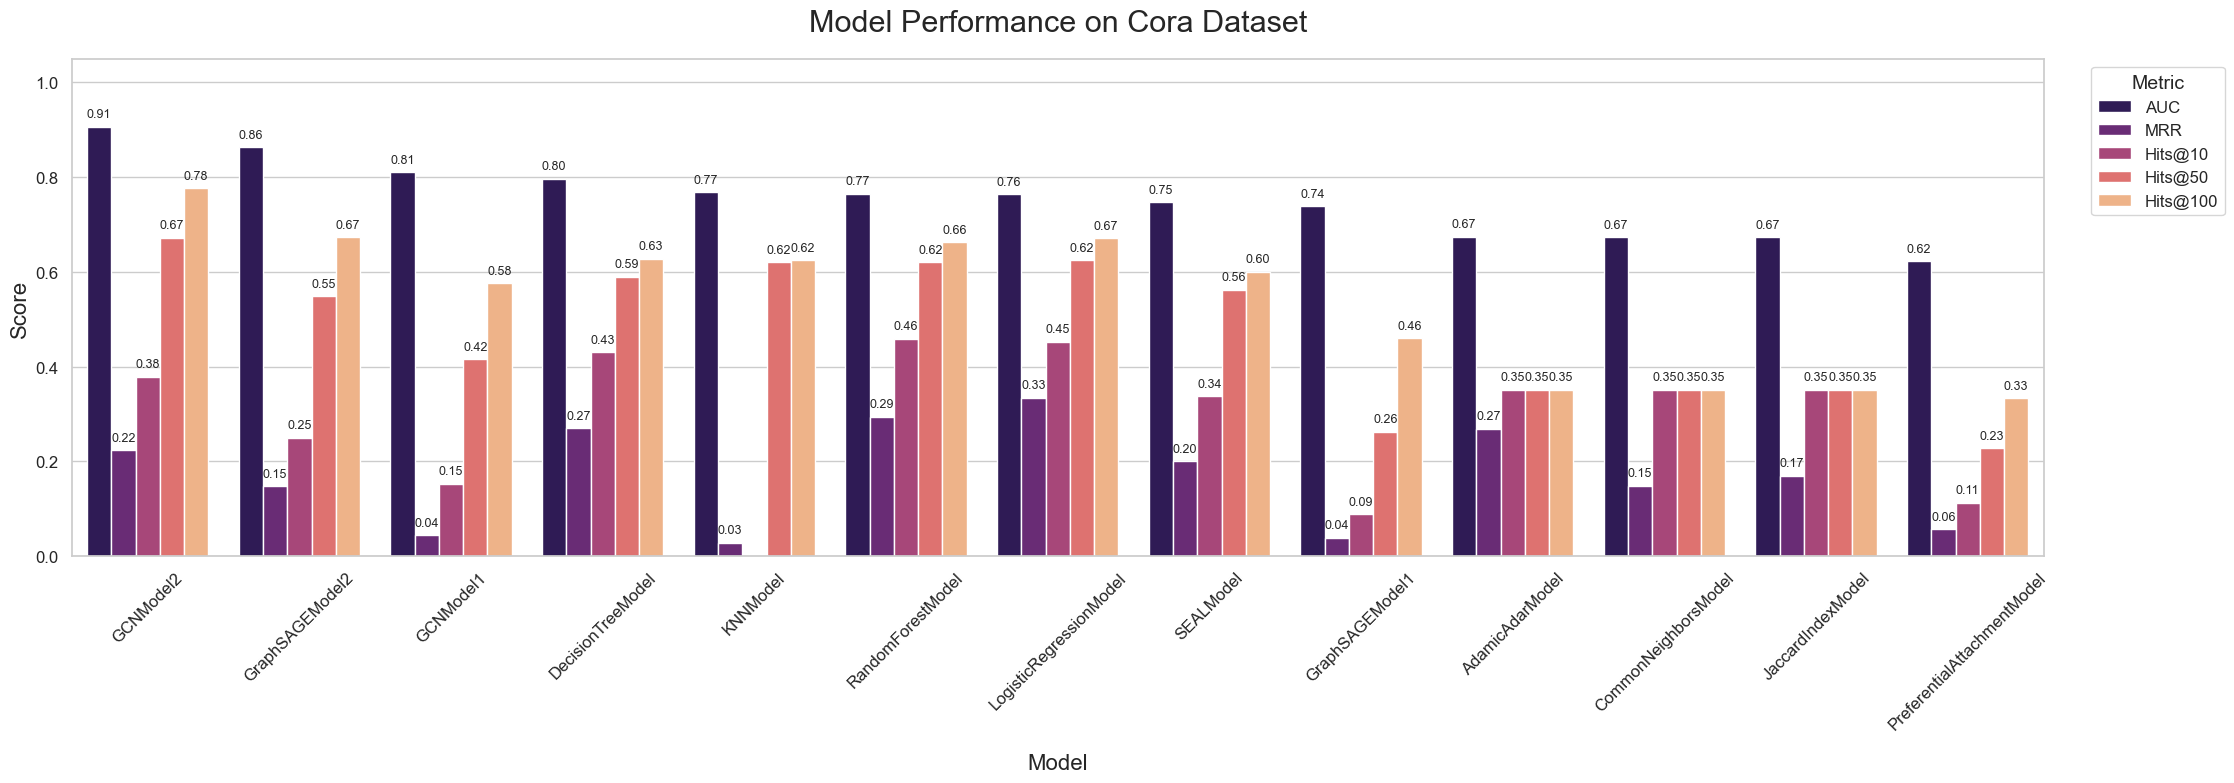

In [8]:
# --- 2. Plotting the model evaluation results ---
plot_metrics('Cora')

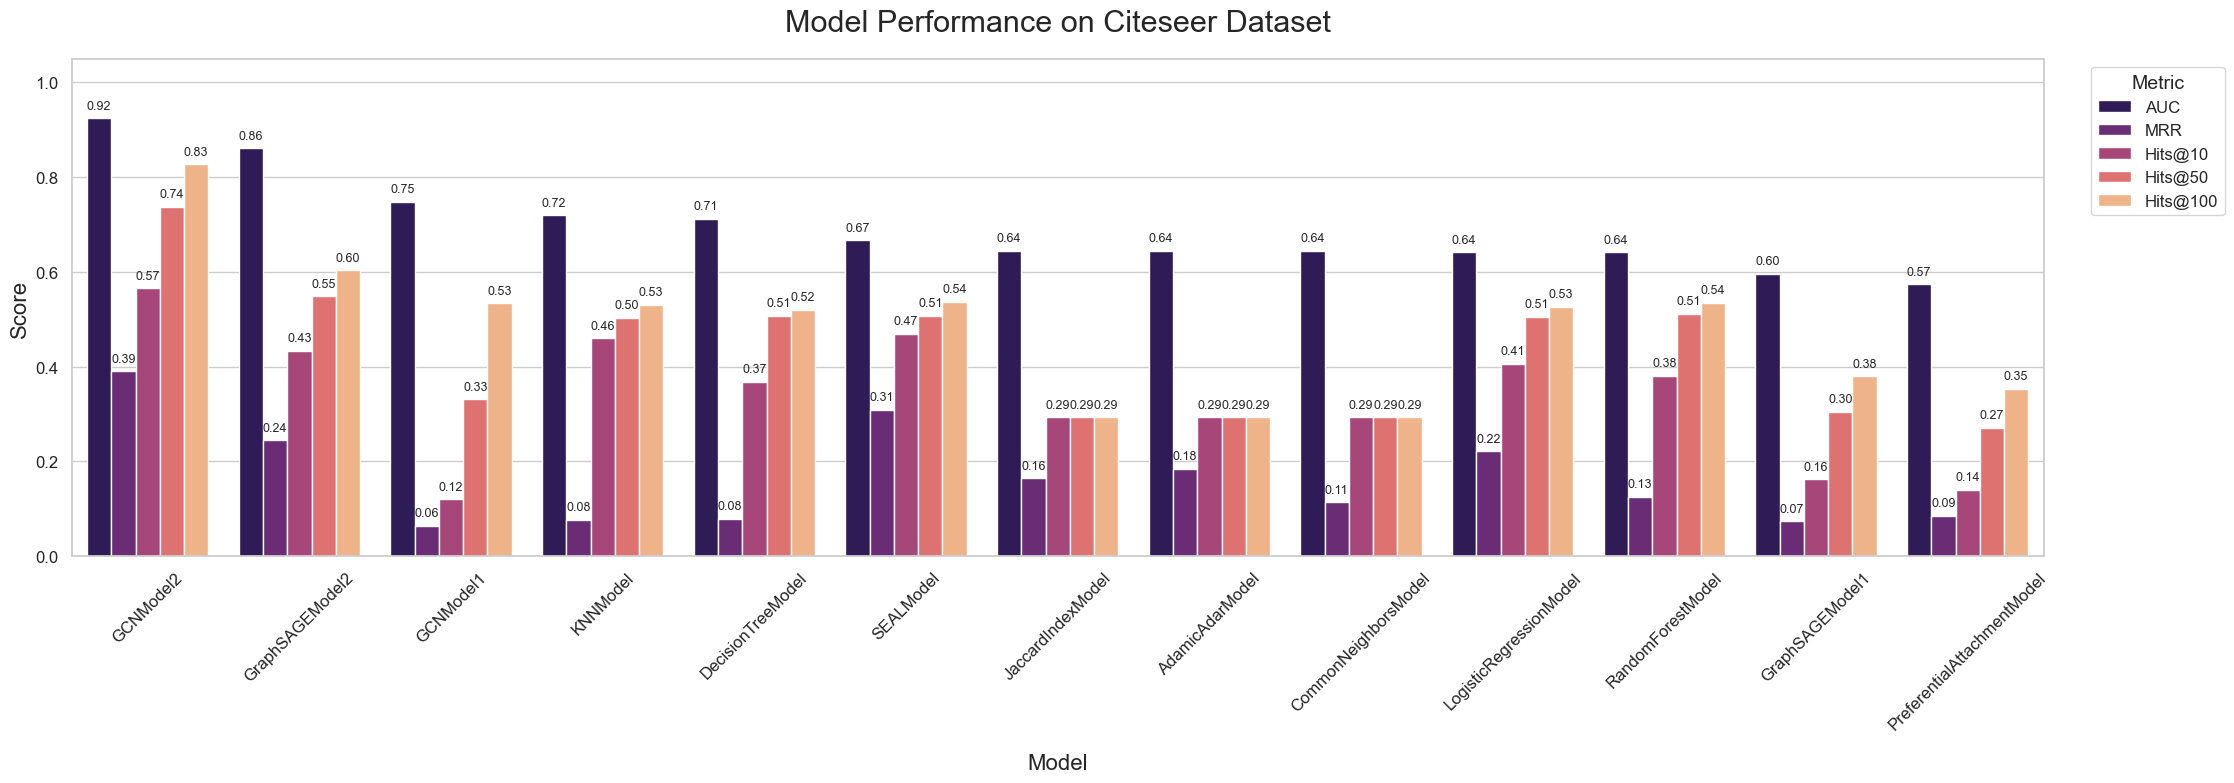

In [10]:
plot_metrics('Citeseer')

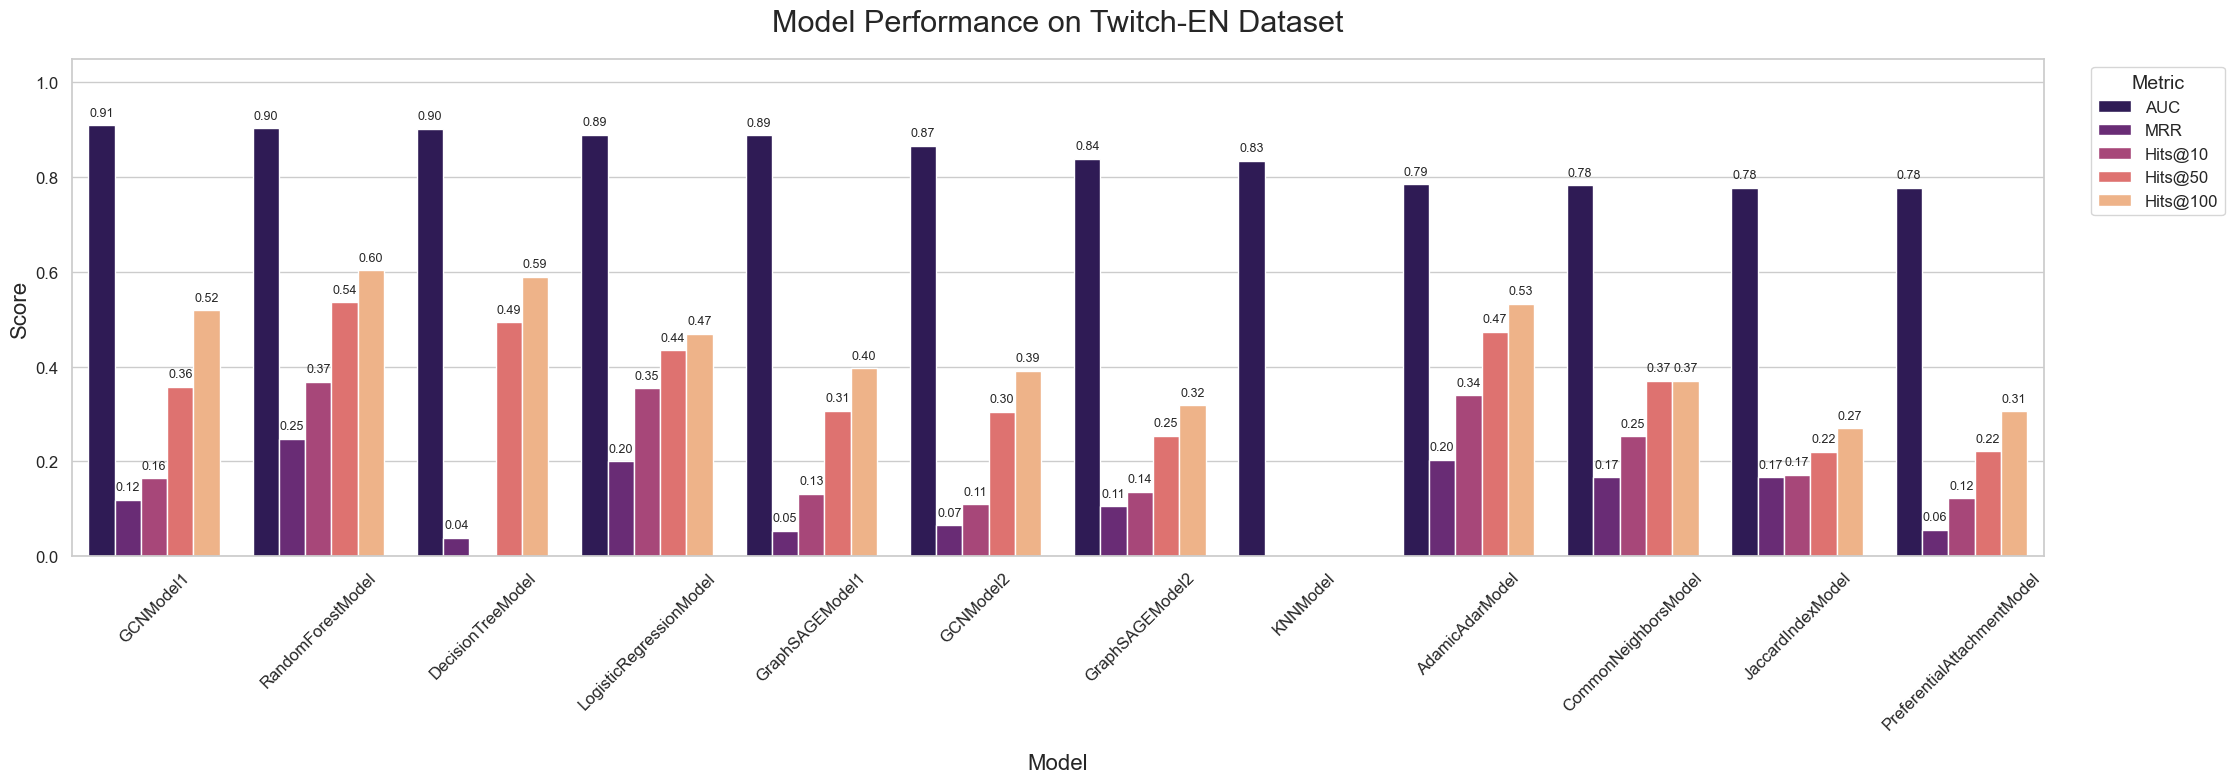

In [28]:
plot_metrics("Twitch-EN")

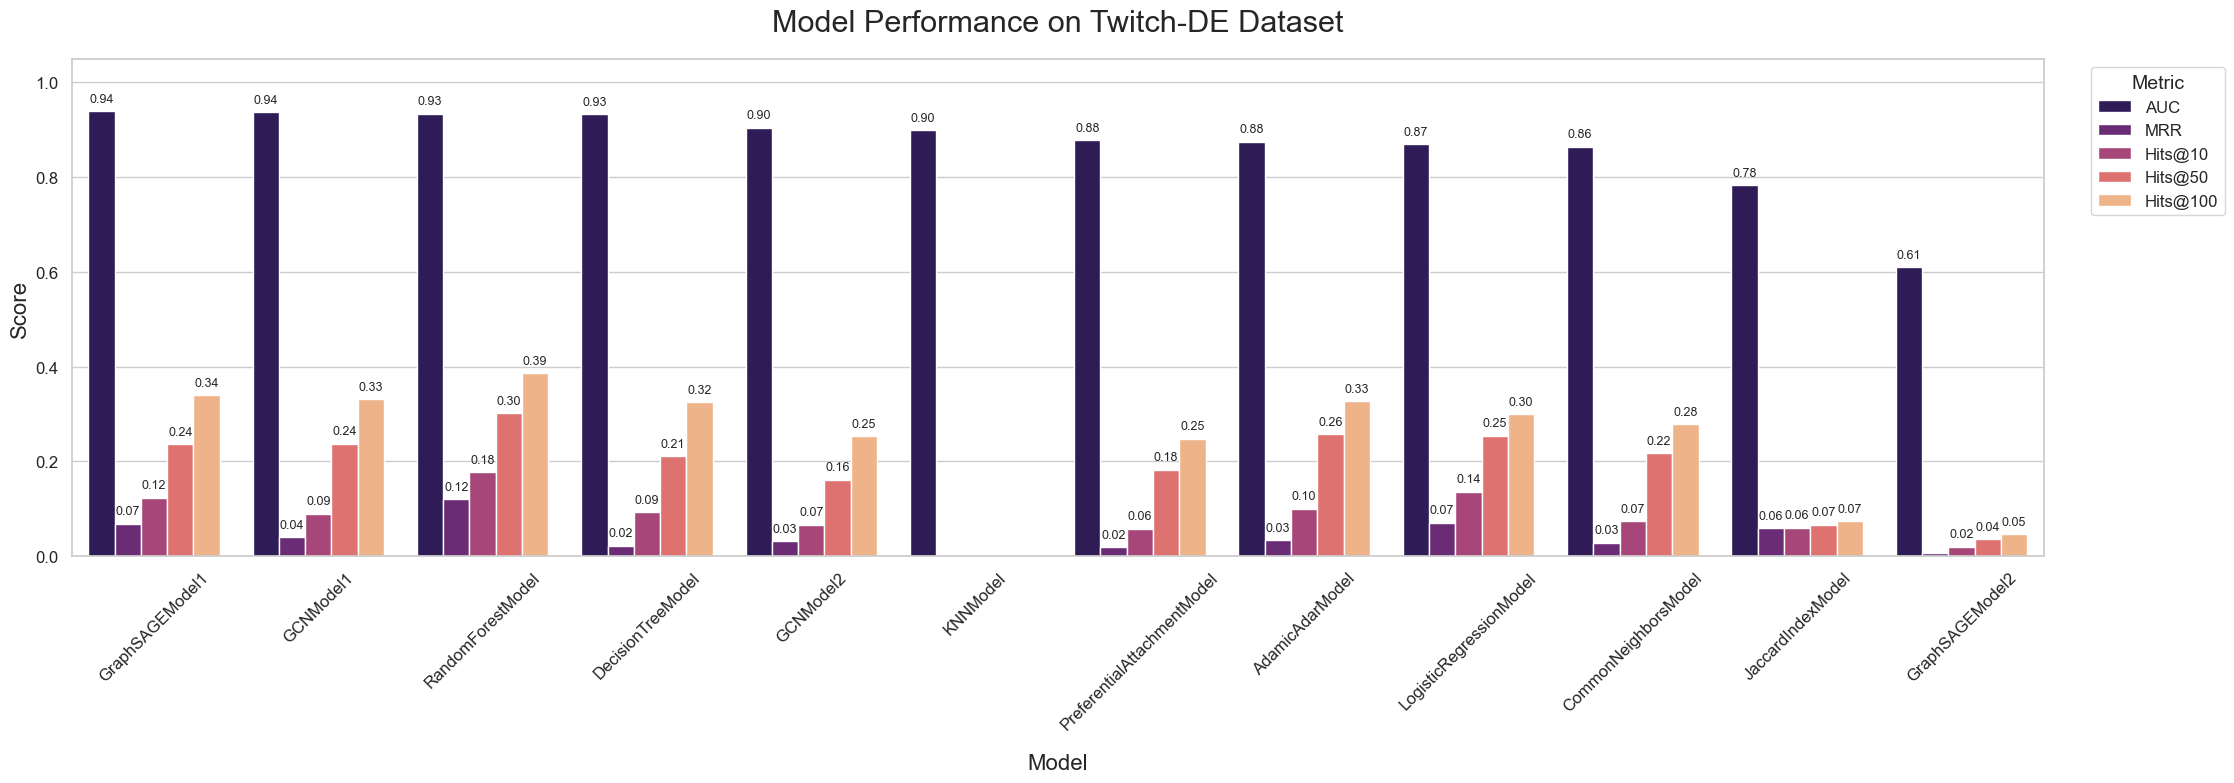

In [29]:
plot_metrics('Twitch-DE')

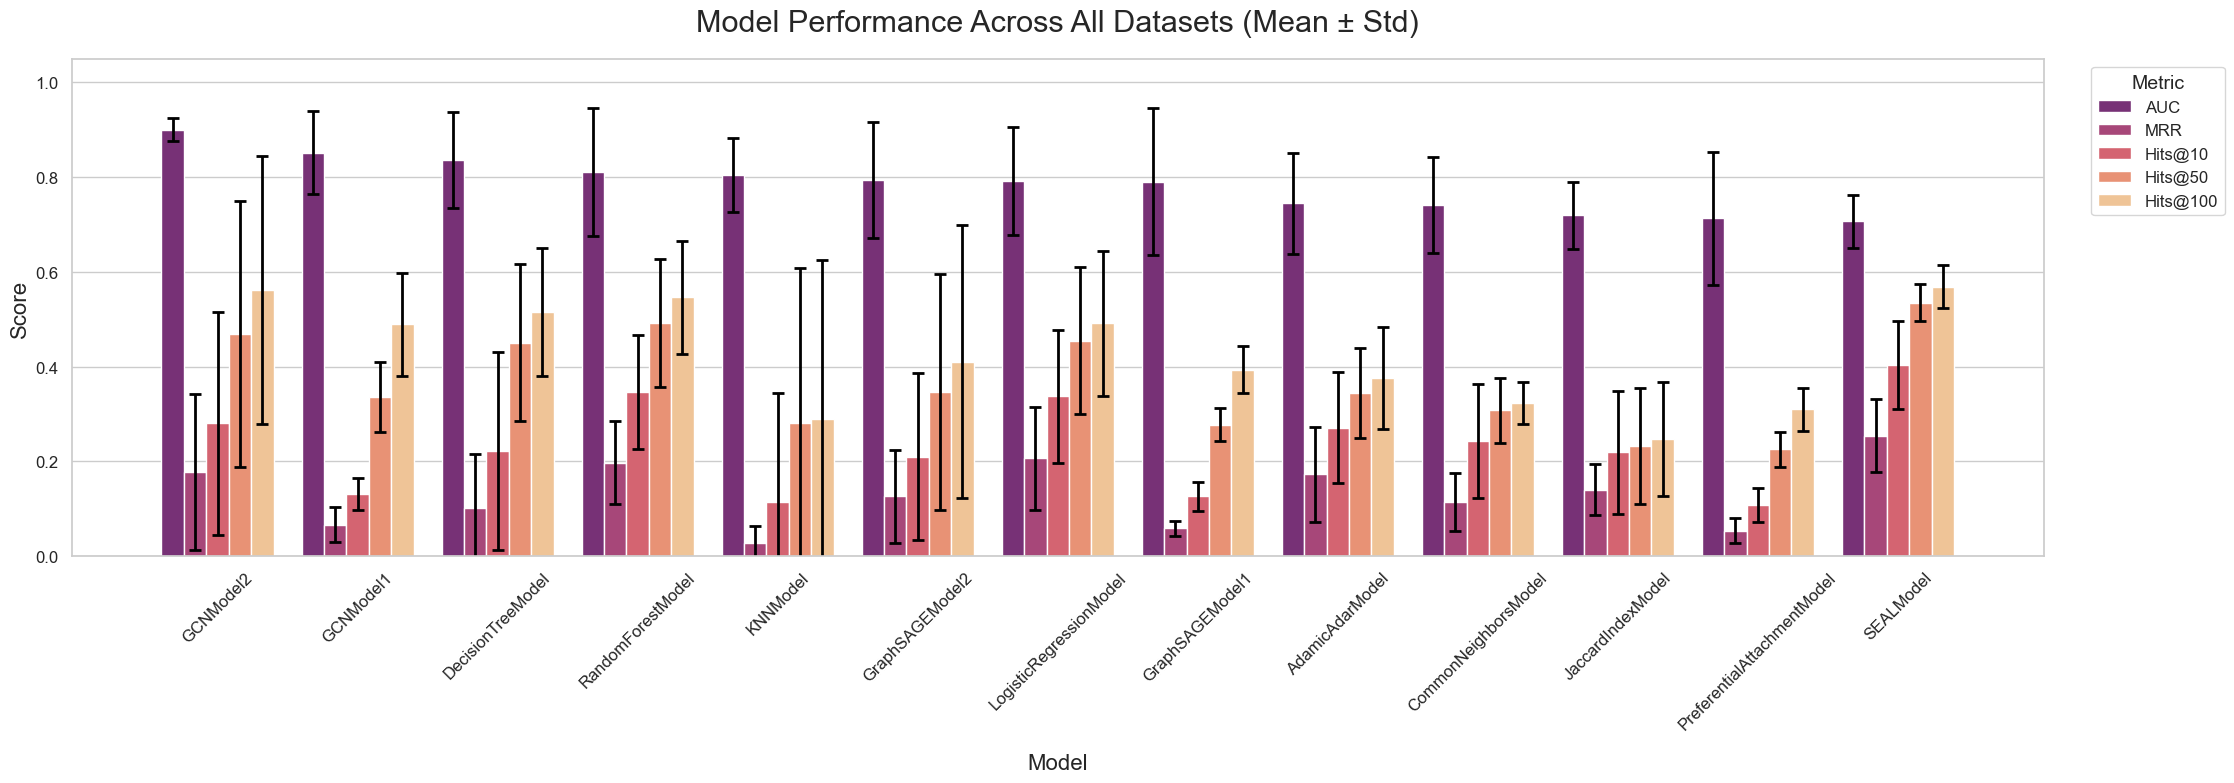


SUMMARY STATISTICS: Model Performance Across All Datasets


,model_name,AUC_mean,AUC_var,MRR_mean,MRR_var,Hits@10_mean,Hits@10_var,Hits@50_mean,Hits@50_var,Hits@100_mean,Hits@100_var
4,GCNModel2,0.9003,0.0006,0.1779,0.0271,0.2804,0.0554,0.4691,0.0784,0.5619,0.0802
3,GCNModel1,0.8514,0.0077,0.0668,0.0014,0.1320,0.0011,0.3357,0.0055,0.4900,0.0118
2,DecisionTreeModel,0.8359,0.0102,0.1026,0.0130,0.2229,0.0437,0.4506,0.0273,0.5159,0.0182
11,RandomForestModel,0.8111,0.0182,0.1972,0.0077,0.3465,0.0143,0.4925,0.0184,0.5469,0.0142
8,KNNModel,0.8055,0.0061,0.0275,0.0013,0.1151,0.0530,0.2809,0.1075,0.2888,0.1127
6,GraphSAGEModel2,0.7936,0.0150,0.1264,0.0097,0.2102,0.0311,0.3468,0.0622,0.4107,0.0826
9,LogisticRegressionModel,0.7912,0.0130,0.2064,0.0117,0.3374,0.0196,0.4550,0.0240,0.4918,0.0236
5,GraphSAGEModel1,0.7908,0.0240,0.0588,0.0002,0.1267,0.0009,0.2777,0.0012,0.3941,0.0025
0,AdamicAdarModel,0.7446,0.0112,0.1726,0.0099,0.2710,0.0137,0.3439,0.0090,0.3764,0.0115
1,CommonNeighborsModel,0.7413,0.0103,0.1144,0.0038,0.2430,0.0143,0.3079,0.0047,0.3234,0.0019


In [ ]:
# --- Mean and Variance Analysis Across All Datasets ---

def plot_mean_variance_metrics():
    save_fig = True
    
    model_stats = []
    
    for model in avg_df['model_name'].unique():
        model_data = avg_df[avg_df['model_name'] == model]
        
        stats_dict = {
            'model_name': model,
            'AUC_mean': model_data['AUC'].mean(),
            'AUC_var': model_data['AUC'].var(),
            'MRR_mean': model_data['MRR'].mean(),
            'MRR_var': model_data['MRR'].var(),
            'Hits@10_mean': model_data['Hits@10'].mean(),
            'Hits@10_var': model_data['Hits@10'].var(),
            'Hits@50_mean': model_data['Hits@50'].mean(),
            'Hits@50_var': model_data['Hits@50'].var(),
            'Hits@100_mean': model_data['Hits@100'].mean(),
            'Hits@100_var': model_data['Hits@100'].var()
        }
        model_stats.append(stats_dict)
    
    model_stats_df = pd.DataFrame(model_stats)
    model_stats_df = model_stats_df.sort_values(by='AUC_mean', ascending=False)
    
    mean_cols = ['AUC_mean', 'MRR_mean', 'Hits@10_mean', 'Hits@50_mean', 'Hits@100_mean']
    var_cols = ['AUC_var', 'MRR_var', 'Hits@10_var', 'Hits@50_var', 'Hits@100_var']
    
    melted_means = model_stats_df.melt(
        id_vars=['model_name'],
        value_vars=mean_cols,
        var_name='Metric',
        value_name='Mean'
    )
    
    melted_vars = model_stats_df.melt(
        id_vars=['model_name'],
        value_vars=var_cols,
        var_name='Metric',
        value_name='Variance'
    )
    
    melted_means['Metric'] = melted_means['Metric'].str.replace('_mean', '')
    melted_vars['Metric'] = melted_vars['Metric'].str.replace('_var', '')
    
    plot_data = pd.merge(melted_means, melted_vars, on=['model_name', 'Metric'])
    
    sns.set_theme(style="whitegrid")
    fig, ax = plt.subplots(figsize=(25, 8))
    
    magma_colors = sns.color_palette('magma', n_colors=7)
    custom_palette = magma_colors[2:7]

    
    barplot = sns.barplot(
        data=plot_data,
        x='model_name',
        y='Mean',
        hue='Metric',
        ax=ax,
        palette=custom_palette
    )
    
    models = plot_data['model_name'].unique()
    metrics = plot_data['Metric'].unique()
    
    bar_positions = {}
    for i, model in enumerate(models):
        for j, metric in enumerate(metrics):
            bar_width = 0.8 / len(metrics)
            x_pos = i + (j - len(metrics)/2 + 0.5) * bar_width
            bar_positions[(model, metric)] = x_pos
    
    for _, row in plot_data.iterrows():
        model = row['model_name']
        metric = row['Metric']
        mean_val = row['Mean']
        var_val = row['Variance']
        std_val = var_val ** 0.5
        
        x_pos = bar_positions[(model, metric)]
        
        ax.errorbar(x_pos, mean_val, yerr=std_val, 
                   fmt='none', color='black', capsize=4, capthick=2, linewidth=2)
    
    ax.set_title('Model Performance Across All Datasets (Mean ± Std)', fontsize=22, pad=20)
    ax.set_xlabel('Model', fontsize=16, labelpad=15)
    ax.set_ylabel('Score', fontsize=16)
    ax.tick_params(axis='x', rotation=45, labelsize=12)
    ax.tick_params(axis='y', labelsize=12)
    ax.set_ylim(0, 1.05)
    
    for p in barplot.patches:
        if p.get_height() > 0.01:
            barplot.annotate("",
                           (p.get_x() + p.get_width() / 2., p.get_height()),
                           ha='center', va='center',
                           xytext=(0, 9),
                           textcoords='offset points',
                           fontsize=9)
    
    plt.legend(title='Metric', fontsize=12, title_fontsize=14, bbox_to_anchor=(1.02, 1), loc='upper left')
    plt.tight_layout(rect=[0, 0, 0.9, 1])
    
    if save_fig:
        fig.savefig('results/plots/model_performance_mean_variance.png', bbox_inches='tight')
    plt.show()
    
    print("\n" + "="*80)
    print("SUMMARY STATISTICS: Model Performance Across All Datasets")
    print("="*80)
    
    summary_table = model_stats_df.copy()
    summary_table = summary_table.round(4)
    
    col_order = ['model_name']
    for metric in ['AUC', 'MRR', 'Hits@10', 'Hits@50', 'Hits@100']:
        col_order.extend([f'{metric}_mean', f'{metric}_var'])
    
    summary_table = summary_table[col_order]
    
    display(summary_table.style.format({
        col: '{:.4f}' for col in summary_table.columns if col != 'model_name'
    }))
    
    return model_stats_df

model_performance_stats = plot_mean_variance_metrics()